### Download and install requisite libraries and/or packages

In [2]:
import sys

!{sys.executable} -m pip install advertools
!{sys.executable} -m pip install plotly==4.14.3
# !{sys.executable} -m pip install jupyterlab "ipywidgets>=7.5"
!{sys.executable} -m pip install "notebook>=5.3" "ipywidgets>=7.5"

### Install Node.js

In [3]:
!conda install nodejs -y

Solving environment: - 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::seaborn-base==0.11.1=pyhd8ed1ab_1
  - conda-forge/noarch::nbclassic==0.2.6=pyhd8ed1ab_0
  - conda-forge/linux-64::blaze==0.11.3=py36_0
  - conda-forge/linux-64::matplotlib==3.3.4=py36h5fab9bb_0
  - defaults/linux-64::_anaconda_depends==5.1.0=py36_2
  - conda-forge/noarch::jupyterlab==3.0.9=pyhd8ed1ab_0
  - conda-forge/noarch::python-language-server==0.36.2=pyhd8ed1ab_0
  - conda-forge/noarch::jupyterlab_server==2.3.0=pyhd8ed1ab_0
  - conda-forge/noarch::pyls-black==0.4.6=pyh9f0ad1d_0
  - conda-forge/linux-64::scikit-image==0.16.2=py36hb3f55d8_0
  - conda-forge/noarch::black==20.8b1=py_1
  - conda-forge/linux-64::anyio==2.1.0=py36h5fab9bb_0
  - conda-forge/linux-64::jupyter_server==1.4.1=py36h5fab9bb_0
  - conda-forge/linux-64::bokeh==2.2.3=py36h5fab9bb_0
  - conda-forge/noarch::aiobotocore==1.2.1=pyhd8ed1ab_0
  -

### JupyterLab renderer support

In [38]:
# !jupyter labextension install jupyterlab-plotly@4.14.3

Config option `kernel_spec_manager_class` not recognized by `InstallLabExtensionApp`.
[W 2021-06-18 06:24:05.866 LabApp] Config option `kernel_spec_manager_class` not recognized by `LabApp`.
An error occured.
ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
See the log file for details:  /tmp/jupyterlab-debug-hexm35w1.log


In [4]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd 
import numpy as np
import sklearn
import os

## Import and prepare CSV files
---

In [84]:
gps_df = pd.read_csv('data/play_store_reviews.csv')
as_df = pd.read_csv('data/app_store_reviews.csv')
combined_df = pd.read_csv('data/combined_reviews.csv')

# convert date columns to datetime since dtypes aren't preserved in csv files
gps_df['at'] = pd.to_datetime(gps_df['at'])
as_df['date'] = pd.to_datetime(as_df['date'])
combined_df['date'] = pd.to_datetime(combined_df['date'])

In [85]:
# drop unnecessary columns
gps_df = gps_df.drop(['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent', 'repliedAt'], axis=1)
gps_df['type'] = 'play store'

gps_df.head(10)

,content,score,at,type
0,I'm so mad...this kind of situation....I thoug...,1,2021-01-07 14:12:21,play store
1,It's great app,5,2021-05-25 03:03:32,play store
2,Very good,5,2020-09-24 00:05:07,play store
3,excellent app,5,2020-08-03 14:57:16,play store
4,all in all easy and goodtransaction for bills ...,5,2021-06-01 15:52:20,play store
5,Wow,5,2020-06-09 11:31:01,play store
6,UNINSTALLING BECAUSE OF THE 2% CHARGE !!!,1,2020-05-24 04:21:05,play store
7,Its fast,5,2021-02-18 04:19:44,play store
8,Why my gcash app have no student id verify,1,2020-07-03 14:59:03,play store
9,Updated & very convenient. Made life easy.,5,2020-08-05 02:15:11,play store


In [86]:
as_df = as_df.drop(['title', 'userName', 'isEdited', 'developerResponse'], axis=1)
as_df['type'] = 'app store'

as_df.head(10)

,date,review,rating,type
0,2021-05-28 07:57:09,I transferred an amount to my gcash account an...,1,app store
1,2020-06-06 12:44:24,"At first you will not be able to log in, but a...",1,app store
2,2020-12-27 01:55:11,"I hope you will not hide this comment, I’ve be...",1,app store
3,2020-05-15 07:05:10,Everything was smooth until nagbago sila ng ap...,1,app store
4,2021-02-25 06:04:31,"i can use to transfer money, but when im using...",1,app store
5,2020-07-28 05:54:09,Automatic na wawala pera ko wala man lang conf...,1,app store
6,2021-05-14 00:38:39,I have a Php30 load voucher that will expire t...,1,app store
7,2021-04-14 16:52:47,I can’t edit the pay bills amount. it is greye...,1,app store
8,2020-06-16 18:28:57,The app is okay but the support is terrible. T...,1,app store
9,2020-01-23 00:33:47,"Since the day i installed the apps, i always u...",5,app store


In [119]:
# init empty DF
combined_df = pd.DataFrame()

# populate lists
date_lst = gps_df['at'].values.tolist() + as_df['date'].values.tolist()
review_lst = gps_df['content'].values.tolist() + as_df['review'].values.tolist()
rating_lst = gps_df['score'].values.tolist() + as_df['rating'].values.tolist()
type_lst = gps_df['type'].values.tolist() + as_df['type'].values.tolist()

# populate DF
combined_df['date'] = date_lst
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df['review'] = review_lst
combined_df['rating'] = rating_lst
combined_df['type'] = type_lst

# shuffle rows
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

# drop rows that have NULL entries
combined_df = combined_df.dropna()

# drop rows that have duplicates
combined_df = combined_df.drop_duplicates()

combined_df.info()
print(display(combined_df.head(10)))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112264 entries, 0 to 112265
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    112264 non-null  datetime64[ns]
 1   review  112264 non-null  object        
 2   rating  112264 non-null  int64         
 3   type    112264 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 4.3+ MB


,date,review,rating,type
0,2020-08-11 03:01:55,I cant sign in you must allowed student I.D if...,1,play store
1,2021-05-15 04:34:10,I really like this app😊,5,play store
2,2020-08-05 22:09:32,"Very reliable,convenient and legit.",5,play store
3,2020-05-15 03:05:15,I love this apps,5,play store
4,2021-01-06 07:54:47,Nice app,5,play store
5,2020-08-15 09:34:28,Marya leonida mndez carpena,5,play store
6,2021-05-31 03:49:43,I don't have any Idea why my Gcredit is decrea...,1,play store
7,2021-01-08 05:02:09,Ang tagal ng authentication code!! Putangena a...,1,play store
8,2021-04-14 16:33:24,Good,5,play store
9,2021-02-17 23:03:14,It easy to cah in or cash out,1,play store


None


## Exploratory Data Analysis
---

In [221]:
# disable false positive warning
pd.options.mode.chained_assignment = None  # default='warn'

# init empty DF
ax = pd.DataFrame()

# Collect and store all App Store reviews in a temporary DF
ax = combined_df.loc[combined_df['type'] == 'app store']
ax['Number of Review Words'] = ax['review'].str.count(' ') + 1

px.histogram(
    ax, 
    x='Number of Review Words',
    color='rating',
    color_discrete_sequence=['navy', 'gold'],
    title='Review Word Count of App Store Reviews',
    barmode='overlay',
    width=950,
    height=500
)

In [222]:
# init empty DF
bx = pd.DataFrame()

# Collect and store all Play Store reviews in a temporary DF
bx = combined_df.loc[combined_df['type'] == 'play store']
bx['Number of Review Words'] = bx['review'].str.count(' ') + 1

px.histogram(
    bx, 
    x='Number of Review Words',
    color='rating',
    color_discrete_sequence=['navy', 'gold'],
    title='Review Word Count of Play Store Reviews',
    barmode='overlay',
    width=950, 
    height=500
)

## Convert plain text to bag-of-words (BOW)
---

In [214]:
import re
import nltk
import advertools as adv
from nltk import word_tokenize          
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# concatenate english and tagalog stopwords into one list
stop_words = stopwords.words('english') + list(adv.stopwords['tagalog'])

token_pattern = re.compile(r"(?u)\b\w\w+\b")

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if len(t) >= 2 and re.match("[a-z].*",t) 
                and re.match(token_pattern, t)]

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Tokenize and lemmatize review data

In [23]:
import time
from sklearn.feature_extraction.text import CountVectorizer

data = []
data = as_df.review.values.tolist()
vocab_size = 100

print('Tokenizing and counting, this may take a few minutes...')
start_time = time.time()
vectorizer = CountVectorizer(
    input='content', 
    analyzer='word', 
    stop_words=stop_words,
    tokenizer=LemmaTokenizer(), 
    max_features=vocab_size, 
    max_df=0.95, 
    min_df=2
)

vectors = vectorizer.fit_transform(data)
vocab_list = vectorizer.get_feature_names()
print('vocab size:', len(vocab_list))

# random shuffle
idx = np.arange(vectors.shape[0])
np.random.shuffle(idx)
vectors = vectors[idx]

print('Done. Time elapsed: {:.2f}s'.format(time.time() - start_time))

Tokenizing and counting, this may take a few minutes...
vocab size: 1000
Done. Time elapsed: 1.18s


### Remove reviews shorter than three words
Very short reviews won't be able to express more than a single topic

In [30]:
print(f'Before:\n{vectors.shape}')

threshold = 25
vectors = vectors[np.array(vectors.sum(axis=1)>threshold).reshape(-1,)]
print(f'\nAfter removing short reviews (<{threshold} words):')        
print(vectors.shape)

print(f'\n{type(vectors), vectors.dtype}')
print(vectors[0])

Before:
(1669, 1000)

After removing short reviews (<25 words):
(263, 1000)

(<class 'scipy.sparse.csr.csr_matrix'>, dtype('int64'))
  (0, 317)	1
  (0, 78)	2
  (0, 135)	1
  (0, 319)	1
  (0, 951)	1
  (0, 620)	1
  (0, 5)	3
  (0, 524)	1
  (0, 985)	1
  (0, 775)	2
  (0, 40)	1
  (0, 647)	1
  (0, 820)	1
  (0, 117)	1
  (0, 167)	2
  (0, 196)	1
  (0, 467)	1
  (0, 706)	1
  (0, 700)	1
  (0, 787)	1
  (0, 126)	1
  (0, 487)	1
  (0, 239)	1
  (0, 165)	1
  (0, 655)	1
  (0, 733)	1


In [31]:
vectors[0].todense()

matrix([[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

### Type-cast input dat to np.float32 since all the params (i.e. weights and biases) in the NTM model will also follow that format
This is a more optimal approach as opposed to repeatedly type-casting during mini-batch training

In [32]:
import scipy.sparse as sparse

vectors = sparse.csr_matrix(vectors, dtype=np.float32)
print(type(vectors), vectors.dtype)
print(vectors[0])

<class 'scipy.sparse.csr.csr_matrix'> float32
  (0, 317)	1.0
  (0, 78)	2.0
  (0, 135)	1.0
  (0, 319)	1.0
  (0, 951)	1.0
  (0, 620)	1.0
  (0, 5)	3.0
  (0, 524)	1.0
  (0, 985)	1.0
  (0, 775)	2.0
  (0, 40)	1.0
  (0, 647)	1.0
  (0, 820)	1.0
  (0, 117)	1.0
  (0, 167)	2.0
  (0, 196)	1.0
  (0, 467)	1.0
  (0, 706)	1.0
  (0, 700)	1.0
  (0, 787)	1.0
  (0, 126)	1.0
  (0, 487)	1.0
  (0, 239)	1.0
  (0, 165)	1.0
  (0, 655)	1.0
  (0, 733)	1.0


In [33]:
vectors[0].todense()

matrix([[0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

### Split data to training (20%), validation (40%), and test (40%) datasets

In [34]:
n_train = int(0.2 * vectors.shape[0])

# split train and test
train_vectors = vectors[:n_train, :]
test_vectors = vectors[n_train:, :]

# further split test set into validation set (val_vectors) and test  set (test_vectors)
n_test = test_vectors.shape[0]
val_vectors = test_vectors[:n_test//2, :]
test_vectors = test_vectors[n_test//2:, :]

print(train_vectors.shape, test_vectors.shape, val_vectors.shape)

(52, 1000) (106, 1000) (105, 1000)


### Store data in S3

In [16]:
# import os
# from sagemaker import get_execution_role

# role = get_execution_role()

# bucket = 'sagemaker-us-east-1-305262579855'
# prefix = 'sagemaker/regalado'

# train_prefix = os.path.join(prefix, 'train')
# valid_prefix = os.path.join(prefix, 'valid')
# output_prefix = os.path.join(prefix, 'output')

# s3_train_data = os.path.join('s3://', bucket, train_prefix)
# s3_valid_data = os.path.join('s3://', bucket, valid_prefix)
# output_path = os.path.join('s3://', bucket, output_prefix)
# print('Training set location', s3_train_data)
# print('Validation set location', s3_valid_data)
# print('\nTrained model will be saved at', output_path)

### Convert data into RecordIO Protobuf format using the SageMaker Python API

In [35]:
import scipy

# convert sparse CSR matrices to numpy arrays
train_vectors = scipy.sparse.csr_matrix.toarray(train_vectors)
val_vectors = scipy.sparse.csr_matrix.toarray(val_vectors)
test_vectors = scipy.sparse.csr_matrix.toarray(test_vectors)

In [36]:
import io
import boto3
import sagemaker
import datetime as dt
import sagemaker.amazon.common as smac

sesh = sagemaker.Session()
prefix = "sagemaker/regalado"
bucket = sesh.default_bucket()
curr_dtime = time.strftime("%Y%m%d-%H%M%S")

def convAndStore(dtype, key, vectors):
    # convert data to a recordIO-wrapped protobuf format used by the Amazon SageMaker algorithms
    
    # init memory buffer in RAM where data will be written
    buf = io.BytesIO()

    # write train data (numpy array) into a dense tensor 
    # smac.write_numpy_to_dense_tensor(buf, X_train.astype("float32"), y_train.astype("float32"))
    smac.write_numpy_to_dense_tensor(buf, vectors)

    # sets the file's current position at the offset (0)
    # i.e. set the reference point to the beginning of the memory buffer
    buf.seek(0)
    
    # upload to s3
    key = str(key)
    

    boto3.resource("s3").Bucket(bucket).Object(os.path.join(prefix, dtype, key)).upload_fileobj(buf)
    s3_data = f"s3://{bucket}/{prefix}/{dtype}/{key}"
    
    print(f"Uploaded data at: {s3_data}")
    
    return s3_data
    
s3_train_data = convAndStore('train', curr_dtime, train_vectors)
s3_valid_data = convAndStore('valid', curr_dtime, val_vectors)
s3_test_data = convAndStore('test', curr_dtime, test_vectors)

Uploaded data at: s3://sagemaker-us-east-1-305262579855/sagemaker/regalado/train/20210617-065525
Uploaded data at: s3://sagemaker-us-east-1-305262579855/sagemaker/regalado/valid/20210617-065525
Uploaded data at: s3://sagemaker-us-east-1-305262579855/sagemaker/regalado/test/20210617-065525


### Store data in S3

In [ ]:
# import os
# import boto3

# def tos3(key, buf):
#     key = str(key)
#     prefix = "regalado"

#     boto3.resource("s3").Bucket(bucket).Object(os.path.join(prefix, "train", key)).upload_fileobj(buf)
#     s3_data = f"s3://{bucket}/{prefix}/train/{key}"

#     print(f"Uploaded data at: {s3_data}")

# # convert data to a recordIO-wrapped protobuf format used by the Amazon SageMaker algorithms
# # then upload to s3
# tos3('train', toProtobuf(train_vectors))

### Convert data into RecordIO Protobuf format using the SageMaker Python API

In [ ]:
# !pip install -U sagemaker

In [ ]:
# import io
# import boto3
# import sagemaker
# import sagemaker.amazon.common as smac

# def split_convert_upload(sparray, bucket, prefix, fname_template='data_part{}.pbr', n_parts=2):
#     chunk_size = sparray.shape[0]// n_parts
    
#     for i in range(n_parts):
#         # Calculate start and end indices
#         start = i*chunk_size
#         end = (i+1)*chunk_size
#         if i+1 == n_parts:
#             end = sparray.shape[0]
        
#         # Convert to record protobuf
#         buf = io.BytesIO()
#         smac.write_spmatrix_to_sparse_tensor(array=sparray[start:end], file=buf, labels=None)
#         buf.seek(0)
        
#         # Upload to s3 location specified by bucket and prefix
#         fname = os.path.join(prefix, fname_template.format(i))
#         boto3.resource("s3").Bucket(bucket).Object(fname).upload_fileobj(buf)
#         print("Uploaded data to s3://{}".format(os.path.join(bucket, fname)))

In [ ]:
# split_convert_upload(
#     train_vectors, bucket=bucket, prefix=train_prefix, fname_template="train_part{}.pbr", n_parts=8
# )
# split_convert_upload(
#     val_vectors, bucket=bucket, prefix=valid_prefix, fname_template="val_part{}.pbr", n_parts=1
# )

## Model training
---

### Set credentials

In [38]:
from sagemaker import tuner
from sagemaker import get_execution_role
from sagemaker.image_uris import retrieve

sesh = sagemaker.Session()
role = get_execution_role()
region = boto3.Session().region_name    
container = retrieve('ntm', region)
client = boto3.Session().client('sagemaker')
output_prefix = os.path.join(prefix, 'output')
output_path = os.path.join('s3://', bucket, output_prefix)

2021-06-17 06:56:41,221 | INFO | image_uris.py:162 | _config_for_framework_and_scope | Same images used for training and inference. Defaulting to image scope: inference.
2021-06-17 06:56:41,223 | INFO | image_uris.py:198 | _validate_version_and_set_if_needed | Defaulting to the only supported framework/algorithm version: 1.
2021-06-17 06:56:41,237 | INFO | image_uris.py:224 | _processor | Ignoring unnecessary instance type: None.


In [39]:
!pip install 'sagemaker[local]' --upgrade

     |████████████████████████████████| 414 kB 24.1 MB/s eta 0:00:01
  Created wheel for sagemaker: filename=sagemaker-2.46.0-py2.py3-none-any.whl size=582932 sha256=ce15a405bf8050b073cbbbe5217bc5f9d6868cd40bacf30f6519dfd86c9f1129
  Stored in directory: /home/ec2-user/.cache/pip/wheels/71/15/16/eeb9883d49134b1817b5043b323ea833848ceb8b32a5a02eb7
Successfully built sagemaker
  Attempting uninstall: sagemaker
    Found existing installation: sagemaker 2.41.0
    Uninstalling sagemaker-2.41.0:
      Successfully uninstalled sagemaker-2.41.0


In [106]:
!sudo service docker restart

Stopping docker: [  OK  ]
Starting docker:	.[  OK  ]


In [107]:
ntm = sagemaker.estimator.Estimator(
    container,
    role, 
    instance_count=1, 
    instance_type='ml.c4.xlarge', # Free-tier instance
    output_path=output_path,
    sagemaker_session=sesh
)

In [108]:
num_topics = 8

ntm.set_hyperparameters(
    num_topics=num_topics, 
    feature_dim=vocab_size, 
    epochs=100, 
    num_patience_epochs=5, 
    tolerance=0.001,
#     mini_batch_size=128,
#     learning_rate=1e-4
)

## Base training
---

In [109]:
# ntm.fit(inputs={'train': s3_train_data, 'validation': s3_valid_data})

## Automatic Hyperparameter Tuning
---

In [110]:
hyperparameter_ranges = {
    'weight_decay': tuner.ContinuousParameter(0.1, 1.0),
    'mini_batch_size': tuner.IntegerParameter(16, 2048),
    'learning_rate': tuner.ContinuousParameter(1e-4, 0.1),
    'rescale_gradient': tuner.ContinuousParameter(0.1, 1.0),
    'optimizer': tuner.CategoricalParameter(['sgd', 'adam', 'adadelta']),
    'encoder_layers_activation': tuner.CategoricalParameter(['sigmoid', 'tanh', 'relu'])
}

objective_metric_name = 'validation:total_loss'

In [111]:
hyperparameter_tuner = tuner.HyperparameterTuner(
    ntm,
    objective_metric_name,
    hyperparameter_ranges, 
    objective_type='Minimize',
    max_jobs=12,
    max_parallel_jobs=3
)

In [112]:
hyperparameter_tuner.fit(
    {'train': s3_train_data, 'validation': s3_valid_data},
    include_cls_metadata=False,
    wait=False
)

job_name = hyperparameter_tuner.latest_tuning_job.job_name

response = client.describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=job_name
)

response['HyperParameterTuningJobStatus']

2021-06-17 08:28:43,717 | INFO | image_uris.py:198 | _validate_version_and_set_if_needed | Defaulting to the only supported framework/algorithm version: latest.
2021-06-17 08:28:43,729 | INFO | image_uris.py:224 | _processor | Ignoring unnecessary instance type: None.
2021-06-17 08:28:43,731 | INFO | session.py:2050 | create_tuning_job | Creating hyperparameter tuning job with name: ntm-210617-0828


'InProgress'

In [113]:
from pprint import pprint

pprint(response)

{'CreationTime': datetime.datetime(2021, 6, 17, 8, 28, 44, 5000, tzinfo=tzlocal()),
 'HyperParameterTuningJobArn': 'arn:aws:sagemaker:us-east-1:305262579855:hyper-parameter-tuning-job/ntm-210617-0828',
 'HyperParameterTuningJobConfig': {'HyperParameterTuningJobObjective': {'MetricName': 'validation:total_loss',
                                                                        'Type': 'Minimize'},
                                   'ParameterRanges': {'CategoricalParameterRanges': [{'Name': 'optimizer',
                                                                                       'Values': ['sgd',
                                                                                                  'adam',
                                                                                                  'adadelta']},
                                                                                      {'Name': 'encoder_layers_activation',
                                       

In [114]:
hyperparameter_tuner.__dict__

{'estimator': <sagemaker.estimator.Estimator at 0x7f169d4097b8>,
 'objective_metric_name': 'validation:total_loss',
 '_hyperparameter_ranges': {'weight_decay': <sagemaker.parameter.ContinuousParameter at 0x7f169d3c4cc0>,
  'mini_batch_size': <sagemaker.parameter.IntegerParameter at 0x7f169d3c4d30>,
  'learning_rate': <sagemaker.parameter.ContinuousParameter at 0x7f169d3c4d68>,
  'rescale_gradient': <sagemaker.parameter.ContinuousParameter at 0x7f169d3c4da0>,
  'optimizer': <sagemaker.parameter.CategoricalParameter at 0x7f169d3c4dd8>,
  'encoder_layers_activation': <sagemaker.parameter.CategoricalParameter at 0x7f169d3c4e10>},
 'metric_definitions': None,
 'estimator_dict': None,
 'objective_metric_name_dict': None,
 '_hyperparameter_ranges_dict': None,
 'metric_definitions_dict': None,
 'static_hyperparameters_dict': None,
 'strategy': 'Bayesian',
 'objective_type': 'Minimize',
 'max_jobs': 12,
 'max_parallel_jobs': 3,
 'tags': None,
 'base_tuning_job_name': None,
 '_current_job_name':

In [115]:
tuning_job_name = response['HyperParameterTuningJobName']
%store tuning_job_name

tuning_job_name

Stored 'tuning_job_name' (str)


'ntm-210617-0828'

In [116]:
from time import sleep

while response['HyperParameterTuningJobStatus'] == 'InProgress':
    response = client.describe_hyper_parameter_tuning_job(
        HyperParameterTuningJobName=job_name
    )

    print(response['HyperParameterTuningJobStatus'])
    sleep(60)

InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
Completed


In [117]:
%store -r tuning_job_name

from sagemaker import HyperparameterTuningJobAnalytics

def latest_df():
    analytics = HyperparameterTuningJobAnalytics(tuning_job_name)

    return analytics.dataframe()    

latest_df().sort_values('FinalObjectiveValue', ascending=True)

,encoder_layers_activation,learning_rate,mini_batch_size,optimizer,rescale_gradient,weight_decay,TrainingJobName,TrainingJobStatus,FinalObjectiveValue,TrainingStartTime,TrainingEndTime,TrainingElapsedTimeSeconds
1,tanh,0.001237,1493.0,sgd,0.484804,0.328354,ntm-210617-0828-011-d1efe466,Completed,0.485728,2021-06-17 08:44:02+00:00,2021-06-17 08:44:52+00:00,50.0
0,tanh,0.057332,1356.0,adam,0.531496,0.247604,ntm-210617-0828-012-53111c69,Completed,0.501591,2021-06-17 08:44:58+00:00,2021-06-17 08:45:57+00:00,59.0
2,tanh,0.065826,1356.0,adam,0.549496,0.229604,ntm-210617-0828-010-9f8b5d2d,Completed,0.508656,2021-06-17 08:44:00+00:00,2021-06-17 08:44:55+00:00,55.0
6,tanh,0.077574,772.0,sgd,0.990130,0.527563,ntm-210617-0828-006-a4c94853,Completed,0.878403,2021-06-17 08:36:12+00:00,2021-06-17 08:37:35+00:00,83.0
8,tanh,0.007525,655.0,adam,0.603548,0.201040,ntm-210617-0828-004-23d43dfc,Completed,1.032581,2021-06-17 08:35:29+00:00,2021-06-17 08:36:36+00:00,67.0
7,tanh,0.006554,594.0,adam,0.603548,0.201040,ntm-210617-0828-005-88319572,Completed,1.138991,2021-06-17 08:35:52+00:00,2021-06-17 08:37:01+00:00,69.0
4,tanh,0.070702,508.0,adam,0.111021,0.298828,ntm-210617-0828-008-c31f927d,Completed,1.322625,2021-06-17 08:40:08+00:00,2021-06-17 08:40:53+00:00,45.0
10,tanh,0.001262,410.0,sgd,0.718256,0.194092,ntm-210617-0828-002-b45969d4,Completed,1.768324,2021-06-17 08:31:27+00:00,2021-06-17 08:32:52+00:00,85.0
11,relu,0.001275,361.0,sgd,0.557744,0.571380,ntm-210617-0828-001-21c27c2e,Completed,2.009217,2021-06-17 08:31:19+00:00,2021-06-17 08:32:40+00:00,81.0
5,tanh,0.076293,26.0,adadelta,0.392519,0.849123,ntm-210617-0828-007-2f9b1a06,Completed,6.333210,2021-06-17 08:39:30+00:00,2021-06-17 08:40:36+00:00,66.0


<!-- ### Specify how training and validation data will be distributed to the workers during training
ShardedByS3Key: data files will be sharded to different workers, that is, each worker will receive a different portion of the full data set. -->

In [651]:
# from sagemaker.inputs import TrainingInput

# s3_train = TrainingInput(s3_train_data, distribution="ShardedByS3Key") 
# s3_valid = TrainingInput(s3_valid_data) 

## Retrain model with the best hyperparameter values to instantiate an Estimator object required to deploy a SageMaker endpoint
---

In [118]:
import sagemaker

sesh = sagemaker.Session()

ntm = sagemaker.estimator.Estimator(
    container,
    role, 
    instance_count=1, 
    instance_type='ml.m4.xlarge', # Free-tier instance (Free Tier usage per month for the first 2 months) ~ https://aws.amazon.com/sagemaker/pricing/
    output_path=output_path,
    sagemaker_session=sesh
)

ntm.set_hyperparameters(
    num_topics=num_topics, 
    feature_dim=vocab_size, 
    epochs=100, 
    num_patience_epochs=5, 
    tolerance=0.001,
    weight_decay=0.328354,
    mini_batch_size=1493,
    learning_rate=0.001237,
    rescale_gradient=0.484804,
    optimizer='sgd',
    encoder_layers_activation='tanh'
)

In [119]:
ntm.fit(inputs={"train": s3_train_data, "validation": s3_valid_data})

2021-06-17 08:54:12,007 | INFO | image_uris.py:198 | _validate_version_and_set_if_needed | Defaulting to the only supported framework/algorithm version: latest.
2021-06-17 08:54:12,020 | INFO | image_uris.py:224 | _processor | Ignoring unnecessary instance type: None.
2021-06-17 08:54:12,021 | INFO | session.py:570 | train | Creating training-job with name: ntm-2021-06-17-08-54-12-006


2021-06-17 08:54:12 Starting - Starting the training job...
2021-06-17 08:54:35 Starting - Launching requested ML instancesProfilerReport-1623920052: InProgress
.........
2021-06-17 08:55:55 Starting - Preparing the instances for training......
2021-06-17 08:57:07 Downloading - Downloading input data...
2021-06-17 08:57:36 Training - Downloading the training image...
2021-06-17 08:58:11 Uploading - Uploading generated training model
2021-06-17 08:58:11 Completed - Training job completed
Docker entrypoint called with argument(s): train
Running default environment configuration script
/opt/amazon/lib/python3.7/site-packages/jsonref.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, MutableMapping, Sequence
[06/17/2021 08:58:00 INFO 139957274183488] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/defa

In [177]:
ntm_predictor = ntm.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge')

2021-06-17 09:17:54,134 | INFO | session.py:2552 | create_model | Creating model with name: ntm-2021-06-17-09-17-54-069
2021-06-17 09:17:54,659 | INFO | session.py:2973 | create_endpoint | Creating endpoint with name ntm-2021-06-17-09-17-54-069


---------------!

In [127]:
# def recordio_protobuf_serializer(spmatrix):
#     import io
#     import sagemaker.amazon.common as smac

#     buf = io.BytesIO()
#     smac.write_spmatrix_to_sparse_tensor(array=spmatrix, file=buf, labels=None)
#     buf.seek(0)
#     return buf

# test = recordio_protobuf_serializer(test_vectors[:5])

In [149]:
test_vectors[-5:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [178]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

predictor = sagemaker.predictor.Predictor(
    endpoint_name=ntm_predictor.endpoint_name, 
    sagemaker_session=sesh, 
    serializer=CSVSerializer(), 
    deserializer=JSONDeserializer()
)

results = predictor.predict(test_vectors[-5:])
print(results)

{'predictions': [{'topic_weights': [0.1252945662, 0.1298142374, 0.1243826002, 0.1267755479, 0.1198588908, 0.1227588356, 0.126667276, 0.1244480535]}, {'topic_weights': [0.11939428, 0.1216323078, 0.1258599907, 0.1293791234, 0.1271517873, 0.1228252724, 0.1237316951, 0.1300255507]}, {'topic_weights': [0.1269668043, 0.1256678849, 0.1259482056, 0.1240127012, 0.1251484305, 0.1240605637, 0.1253734827, 0.122821942]}, {'topic_weights': [0.1316499561, 0.1264674067, 0.1242311969, 0.1217291877, 0.1245771497, 0.123893939, 0.1262945086, 0.1211567223]}, {'topic_weights': [0.1268232912, 0.1233947426, 0.1236403361, 0.1249331236, 0.1260447353, 0.1247957647, 0.1290704161, 0.1212975904]}]}


## Delete endpoint after performing inferences
---

In [190]:
sagemaker.Session().delete_endpoint(ntm_predictor.endpoint_name)

2021-06-17 09:26:17,401 | INFO | session.py:3023 | delete_endpoint | Deleting endpoint with name: ntm-2021-06-17-09-17-54-069


In [179]:
predictions = np.array([prediction['topic_weights'] for prediction in results['predictions']])
print(predictions)

[[0.12529457 0.12981424 0.1243826  0.12677555 0.11985889 0.12275884
  0.12666728 0.12444805]
 [0.11939428 0.12163231 0.12585999 0.12937912 0.12715179 0.12282527
  0.1237317  0.13002555]
 [0.1269668  0.12566788 0.12594821 0.1240127  0.12514843 0.12406056
  0.12537348 0.12282194]
 [0.13164996 0.12646741 0.1242312  0.12172919 0.12457715 0.12389394
  0.12629451 0.12115672]
 [0.12682329 0.12339474 0.12364034 0.12493312 0.12604474 0.12479576
  0.12907042 0.12129759]]


Text(0.5, 0, 'Topic ID')

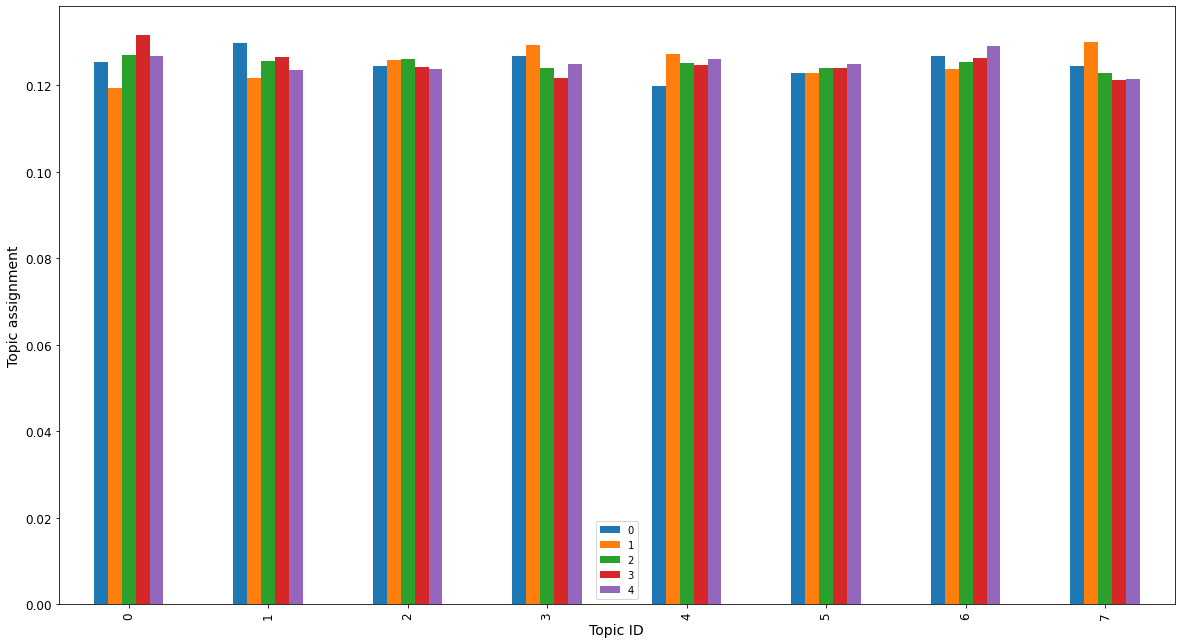

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fs = 12
df=pd.DataFrame(predictions.T)
df.plot(kind='bar', figsize=(20, 11), fontsize=fs)
plt.ylabel('Topic assignment', fontsize=fs+2)
plt.xlabel('Topic ID', fontsize=fs+2)

In [181]:
!{sys.executable} -m pip install mxnet
import mxnet as mx

## Load model artifacts stored in output directory
---

In [182]:
model_path = os.path.join(output_prefix, ntm._current_job_name, "output/model.tar.gz")
model_path

'sagemaker/regalado/output/ntm-2021-06-17-08-54-12-006/output/model.tar.gz'

In [183]:
boto3.resource("s3").Bucket(bucket).download_file(model_path, "downloaded_model.tar.gz")

In [184]:
!pwd

/home/ec2-user/SageMaker/my-experiments


In [185]:
import tarfile
tarfile.open('downloaded_model.tar.gz').extractall()

In [186]:
import zipfile
with zipfile.ZipFile('model_algo-1', 'r') as zip_ref:
    zip_ref.extractall('./')

In [187]:
model = mx.ndarray.load("params")
W = model["arg:projection_weight"]

In [188]:
!{sys.executable} -m pip install wordcloud
import wordcloud as wc

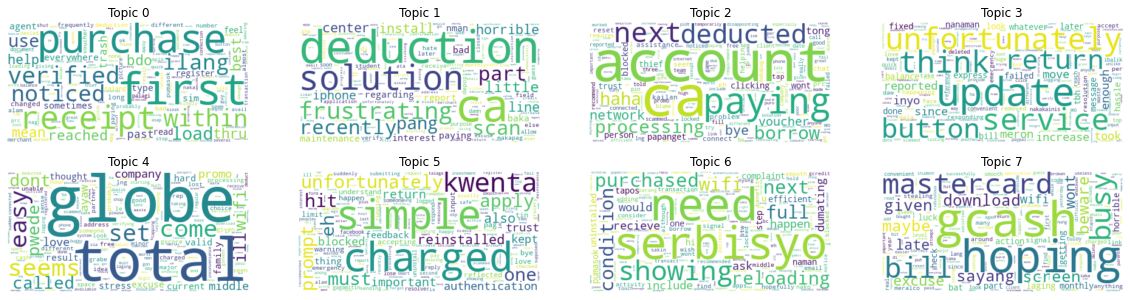

In [189]:
import matplotlib.pyplot as plt

word_to_id = dict()
for i, v in enumerate(vocab_list):
    word_to_id[v] = i

limit = 25
n_col = 4
counter = 0

plt.figure(figsize=(20, 16))
for ind in range(num_topics):

    if counter >= limit:
        break

    title_str = "Topic {}".format(ind)

    # pvals = mx.nd.softmax(W[:, ind]).asnumpy()
    pvals = mx.nd.softmax(mx.nd.array(W[:, ind])).asnumpy()

    word_freq = dict()
    for k in word_to_id.keys():
        i = word_to_id[k]
        word_freq[k] = pvals[i]

    wordcloud = wc.WordCloud(background_color="white").fit_words(word_freq)

    plt.subplot(limit // n_col, n_col, counter + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title_str)
    # plt.close()

    counter += 1